In [1]:
! pip install seaborn
! pip install scikit-learn
! pip install sklearn

In [2]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:

data = pd.read_csv('./data/iris.csv')

data

FileNotFoundError: [Errno 2] No such file or directory: './data/iris.csv'

In [ ]:
data.rename(columns = {"Species":"Target"},inplace = True)

data['Target'] = data['Target'].astype('category')


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Target         150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [ ]:
data.Target.replace({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'}, inplace=True)
Target_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [ ]:
data.drop('Id', axis=1, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Target         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


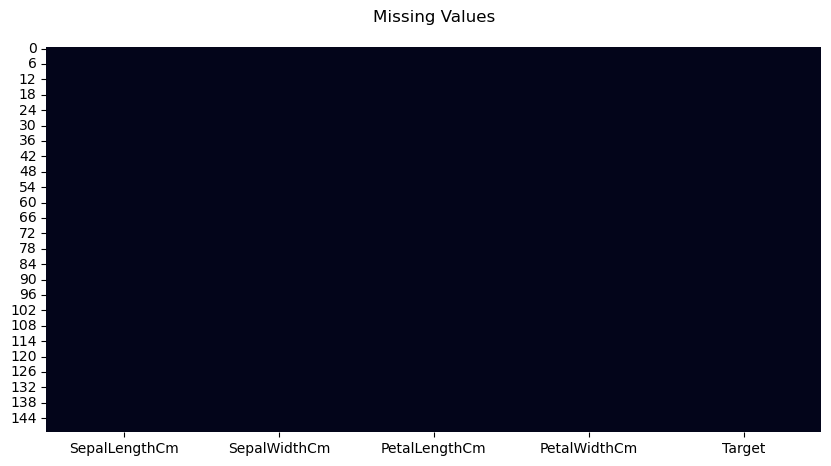

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Target           0
dtype: int64

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

data.isnull().sum()

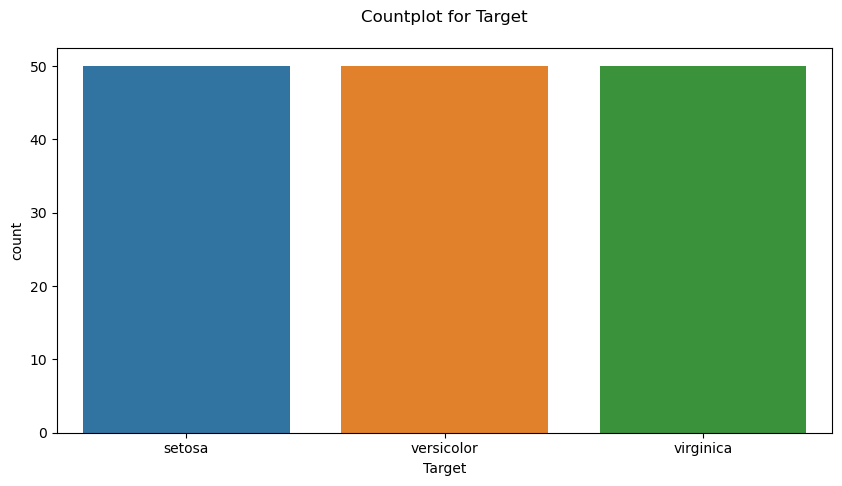

Target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Countplot for Target\n')
sns.countplot(data=data, x='Target')
plt.show()

data['Target'].value_counts()

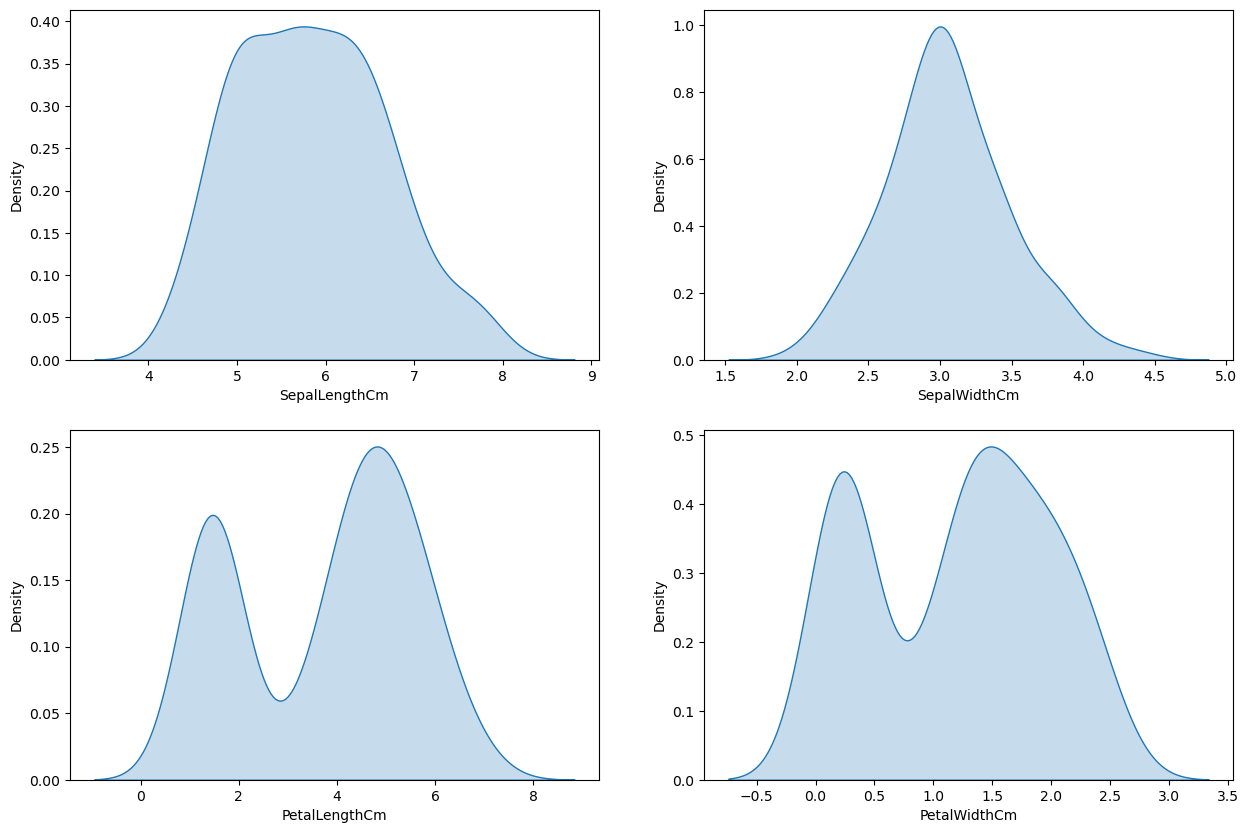

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=data, x=col, fill=True)
plt.show()

data.describe()

In [ ]:
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(data.select_dtypes(float)):
#     plt.subplot(2, 2, i+1)
#     sns.kdeplot(data=data, x=col, fill=True, hue='Target')
# plt.show()

# display(data[['sepal length (cm)', 'sepal width (cm)', 'Target']].groupby('Target').describe())
# data[['petal length (cm)', 'petal width (cm)', 'Target']].groupby('Target').describe()

c:\Users\vince\anaconda3\envs\BaseMLenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


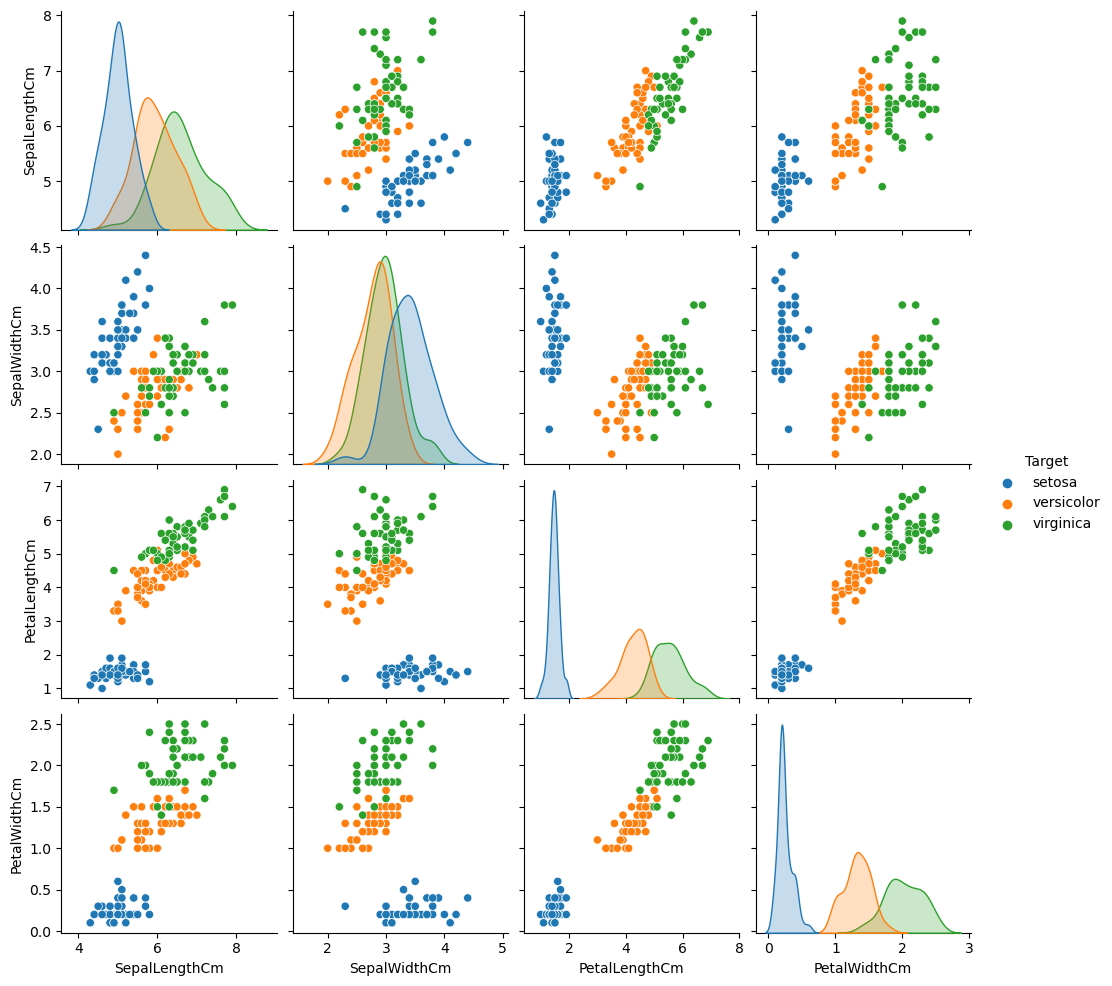

In [ ]:
sns.pairplot(data=data, hue='Target')
plt.show()

In [ ]:
X = data.drop(columns='Target')

y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)
print(X_train.shape)
X_test.shape

(112, 4)


(38, 4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['setosa',
           'virsicolor',
           'virginica']


cm = confusion_matrix(y_train, pred_train, labels=labels)

CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

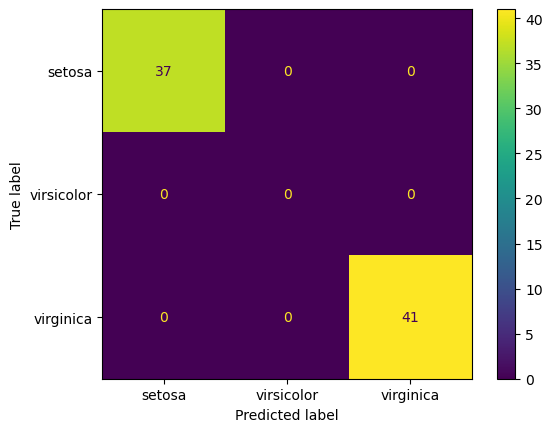

In [ ]:
CM.plot()
plt.show()

In [ ]:

model.score(X_test,y_test)

0.9736842105263158

In [ ]:
pred_test = model.predict(X_test)

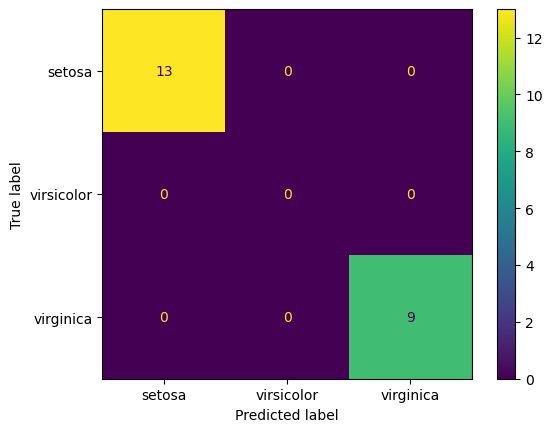

In [ ]:
cm = confusion_matrix(y_test, pred_test, labels=labels)

CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
CM.plot()
plt.show()

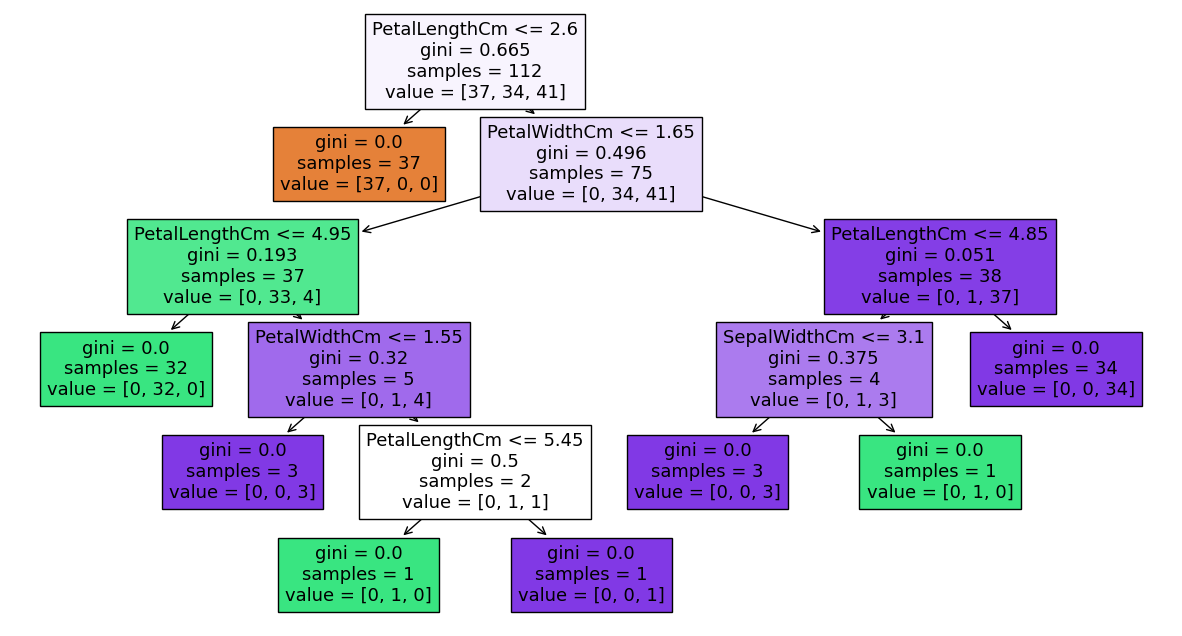

In [ ]:
plt.figure(figsize=(15, 8))

plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()

In [ ]:
arr =[[4.6,3.1,1.2,0.3]]
model.predict(arr)



c:\Users\vince\anaconda3\envs\BaseMLenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [ ]:
# PetalLengthCm = petal_length
# PetalWidthCm = petal_width
# SepalLengthCm = sepal_length
# SepalWidthCm = sepal_width

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    try:
        # Effectuez la prédiction en utilisant le modèle
        prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
        return prediction[0]
    except Exception as e:
        return str(e)

In [ ]:
predict_iris(4.6,3.1,1.2,0.3)

c:\Users\vince\anaconda3\envs\BaseMLenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'setosa'

In [ ]:
model.predict_proba(arr)

c:\Users\vince\anaconda3\envs\BaseMLenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [ ]:
import joblib

In [ ]:
# Save Model
import joblib


# Save the model to a file
joblib.dump(model, 'iris_log_reg.pkl')

['iris_log_reg.pkl']

### Random Forest


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(random_state=1, class_weight='balanced'))

params = {'randomforestclassifier__max_samples': np.linspace(0.1, 0.9, 9),
          'randomforestclassifier__criterion' : ['gini', 'entropy']}
         

grid = GridSearchCV(model, param_grid=params, scoring='f1_macro')

grid.fit(X_train, y_train)

pd.DataFrame(grid.cv_results_).to_csv('grid_results3.csv', index=False)

print(grid.best_params_)
model_RF = grid.best_estimator_

{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_samples': 0.1}


In [ ]:
n, train_score, val_score = learning_curve(model_RF, X_train, y_train,
                                           cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring='f1_macro')

lc = pd.DataFrame({'n': n,
                  'train score': train_score.mean(axis=1),
                  'val score': val_score.mean(axis=1)})
lc

,n,train score,val score
0,8,0.290842,0.178638
1,17,0.543609,0.490206
2,26,0.763142,0.717305
3,35,0.815197,0.740378
4,44,0.936418,0.894674
5,53,0.940093,0.867169
6,62,0.953769,0.906687
7,71,0.958539,0.935335
8,80,0.961129,0.973012
9,89,0.957262,0.963962


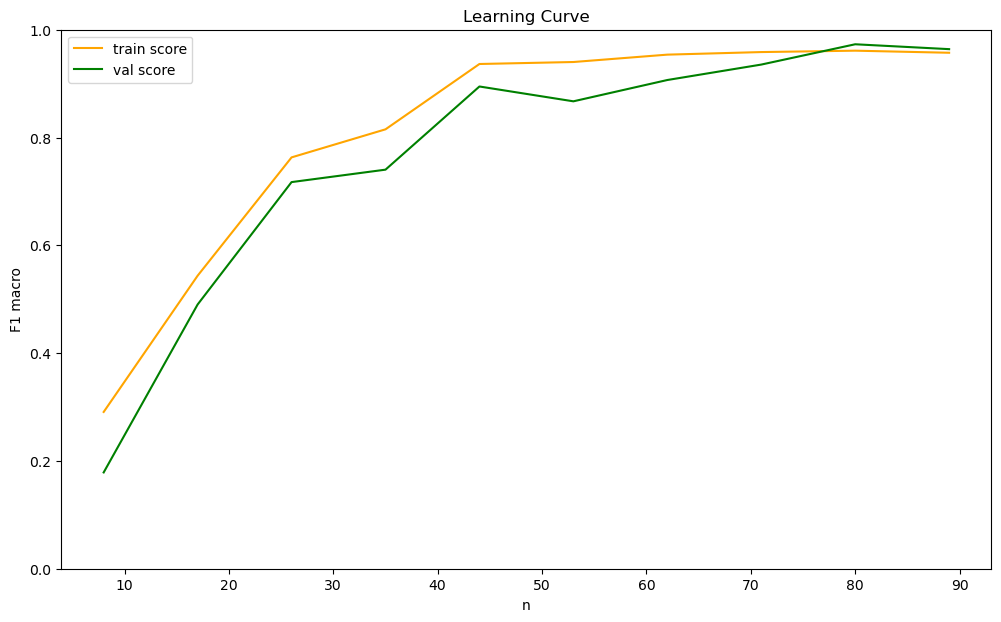

In [ ]:
plt.figure(figsize=(12, 7))
plt.title('Learning Curve')
plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
plt.plot(n, val_score.mean(axis=1), label='val score', color='green')
plt.xlabel('n')
plt.ylabel('F1 macro')
plt.ylim([0,1])
plt.legend()
plt.show()

In [ ]:
def give_learning_curve(model,X_train,y_train):
    n, train_score, val_score = learning_curve(model_RF, X_train, y_train,
                                           cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring='f1_macro')

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'val score': val_score.mean(axis=1)})
    
    
    plt.figure(figsize=(12, 7))
    plt.title('Learning Curve')
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='val score', color='green')
    plt.xlabel('n')
    plt.ylabel('F1 macro')
    plt.ylim([0,1])
    plt.legend()
    plt.show()
    pass

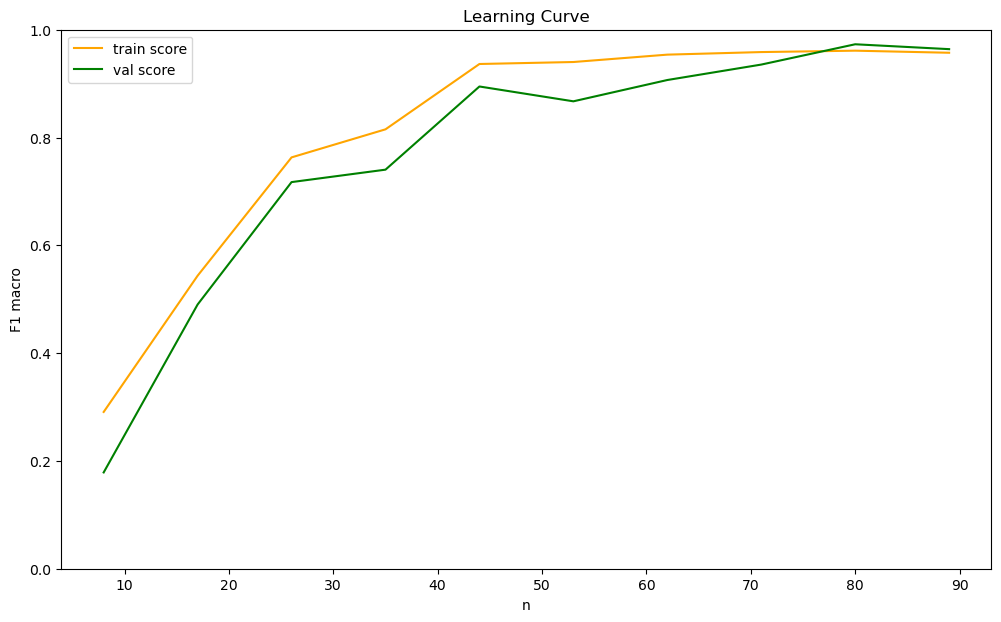

In [ ]:
give_learning_curve(model_RF,X_train,y_train)

### K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [ ]:
params = {'n_neighbors':np.arange(1,5),
          'weights':['uniform','distance'],
         'metric':['euclidean', 'manhattan'] }

In [ ]:
grid_knn = GridSearchCV(model_knn, param_grid=params, verbose=1)

grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
grid_knn.best_score_

0.9557312252964426

In [ ]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
best_knn = grid_knn.best_estimator_

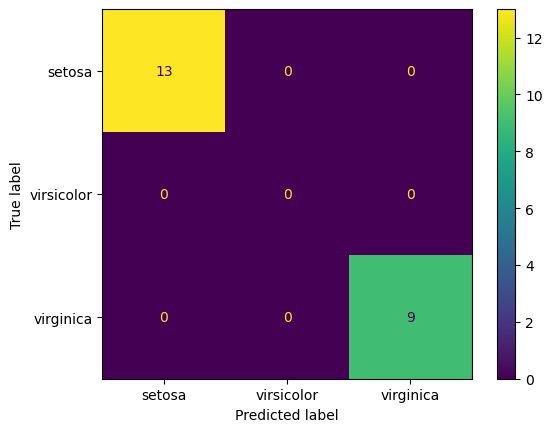

In [ ]:
pred_test = best_knn.predict(X_test)

cm = confusion_matrix(y_test, pred_test, labels=labels)

CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
CM.plot()
plt.show()

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

pour sauvegarder la version des modules sur un notebook jupyter :
    python -m pip freeze > requirements.txt

Nécessaire pour tous les projets python sur git

pour charger les modules spécifiques à un notebook jupyter :
    python -m pip install -r requirements.txt